In [ ]:
# Regression using NN

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate random data
np.random.seed(42)  # For reproducibility
x = np.random.rand(100, 1) * 10  # 100 data points in the range [0, 10]
y = 2 * x + 1 + np.random.randn(100, 1) * 2  # y = 2x + 1 with noise

# Convert to PyTorch tensors
x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)


In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output

    def forward(self, x):
        return self.linear(x)


In [4]:
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [10]:
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    #save the loss
    losses.append(loss)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 3.2263
Epoch [200/1000], Loss: 3.2263
Epoch [300/1000], Loss: 3.2263
Epoch [400/1000], Loss: 3.2263
Epoch [500/1000], Loss: 3.2263
Epoch [600/1000], Loss: 3.2263
Epoch [700/1000], Loss: 3.2263
Epoch [800/1000], Loss: 3.2263
Epoch [900/1000], Loss: 3.2263
Epoch [1000/1000], Loss: 3.2263


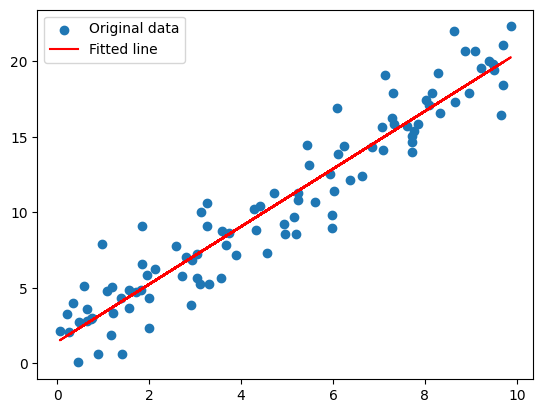

In [11]:
# Predict
predicted = model(x_train).detach().numpy()

# Plot
plt.scatter(x, y, label='Original data')
plt.plot(x, predicted, label='Fitted line', color='r')
plt.legend()
plt.show()


In [7]:
# save the model
torch.save(model.state_dict(), 'model.ckpt')

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

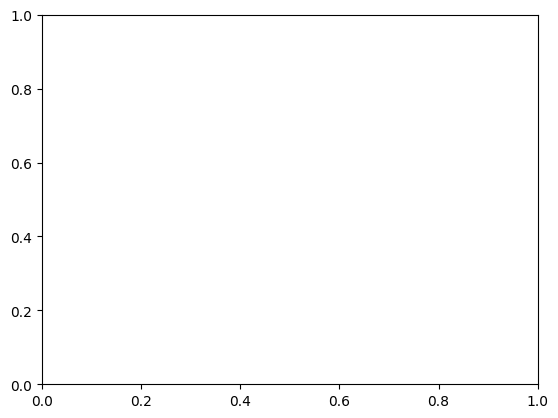

In [12]:

# plot loss vs epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
